## Clustering exercise by K-means

Considering the UCI Machine Learning “Wholesale Customer Dataset”

Repository at https://archive.ics.uci.edu/ml/datasets/wholesale+customers

This dataset refers to customers of a wholesale distributor in Portugal.

Includes annual spending in monetary units (m.u.) across several product categories:

Fresh, Milk, Groceries, Frozen, Detergentes_Paper, Delicatessen.

It also includes 2 categorical variables: Channel (Horeca, Retail) and Region (Lisbon, Porto, Other).

Tasks:
- Segment clients in an appropriate number of clusters, using the K-means algorithm.

## Load Libraries

In [1]:
# Clear data in environment
rm(list = ls()) 
graphics.off()
library(ggplot2)
library(factoextra)
library(dplyr)

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'factoextra' was built under R version 4.2.3"
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




## Read dataset directly from UCI repository

In [2]:
url_path <- paste0("https://archive.ics.uci.edu/ml/machine-learning-databases/",
                   "00292/Wholesale%20customers%20data.csv")
wholesale <- read.csv(url_path, sep = ",")
rm(url_path)

## Prepare data for analysis

In [3]:
# For this exercise, we’ll only use complete cases
wholesale <- na.omit(wholesale) # Remove values not available or missing
# Remove categorical variables and we will use numeric features only
wholesale.num <- wholesale[, 3:8]
head(wholesale.num)
# As K-means calculates distances, we’ll standardize the numerical variables
wholesale.std <- as.data.frame(scale(wholesale.num))
head(wholesale.std)
# Check the mean = 0 and standard deviation = 1, after standardization.
summary(wholesale.std)
sapply(wholesale.std, sd)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
,<int>,<int>,<int>,<int>,<int>,<int>
1,12669,9656,7561,214,2674,1338
2,7057,9810,9568,1762,3293,1776
3,6353,8808,7684,2405,3516,7844
4,13265,1196,4221,6404,507,1788
5,22615,5410,7198,3915,1777,5185
6,9413,8259,5126,666,1795,1451


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.05287300,0.52297247,-0.04106815,-0.5886970,-0.04351919,-0.06626363
2,-0.39085706,0.54383861,0.17012470,-0.2698290,0.08630859,0.08904969
3,-0.44652098,0.40807319,-0.02812509,-0.1373793,0.13308016,2.24074190
4,0.09999758,-0.62331041,-0.39253008,0.6863630,-0.49802132,0.09330484
5,0.83928412,-0.05233688,-0.07926595,0.1736612,-0.23165413,1.29786952
6,-0.20457266,0.33368675,-0.29729863,-0.4955909,-0.22787885,-0.02619421


     Fresh              Milk            Grocery            Frozen        
 Min.   :-0.9486   Min.   :-0.7779   Min.   :-0.8364   Min.   :-0.62763  
 1st Qu.:-0.7015   1st Qu.:-0.5776   1st Qu.:-0.6101   1st Qu.:-0.47988  
 Median :-0.2764   Median :-0.2939   Median :-0.3363   Median :-0.31844  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.3901   3rd Qu.: 0.1889   3rd Qu.: 0.2846   3rd Qu.: 0.09935  
 Max.   : 7.9187   Max.   : 9.1732   Max.   : 8.9264   Max.   :11.90545  
 Detergents_Paper    Delicassen     
 Min.   :-0.6037   Min.   :-0.5396  
 1st Qu.:-0.5505   1st Qu.:-0.3960  
 Median :-0.4331   Median :-0.1984  
 Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.2182   3rd Qu.: 0.1047  
 Max.   : 7.9586   Max.   :16.4597  

Fresh             Milk          Grocery           Frozen 
               1                1                1                1 
Detergents_Paper       Delicassen 
               1                1

## Choose the K parameter

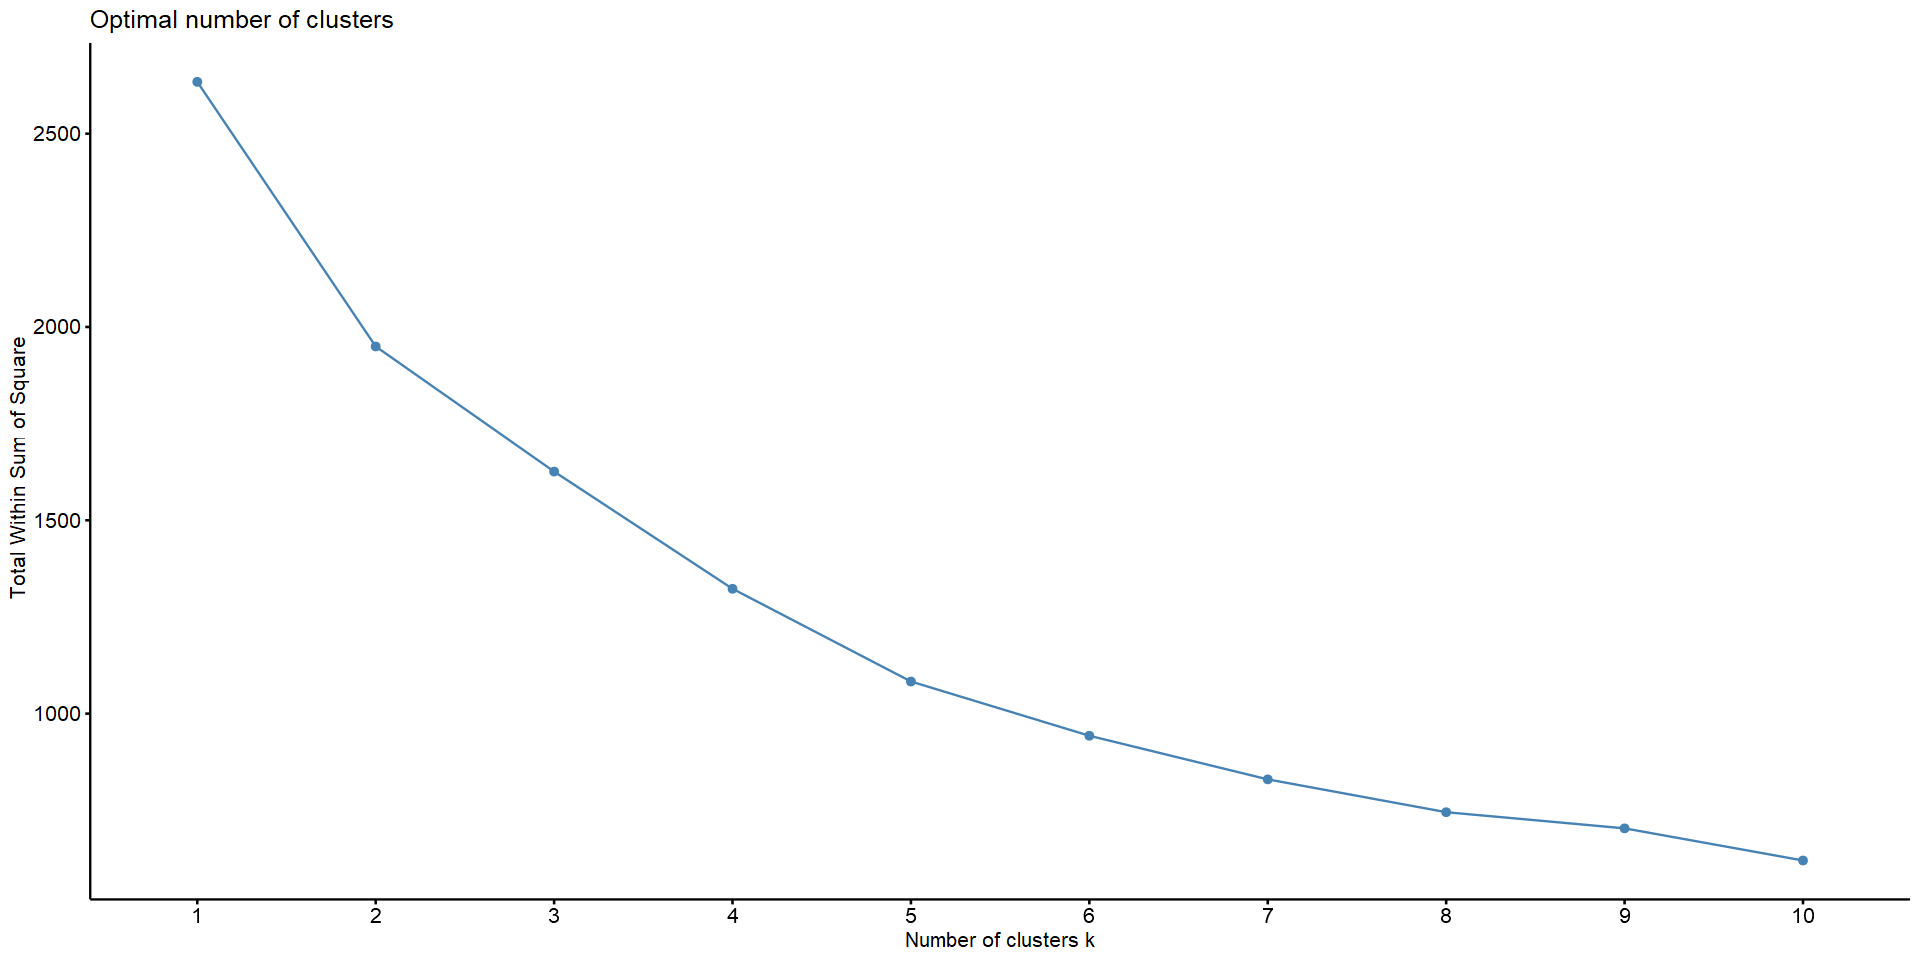

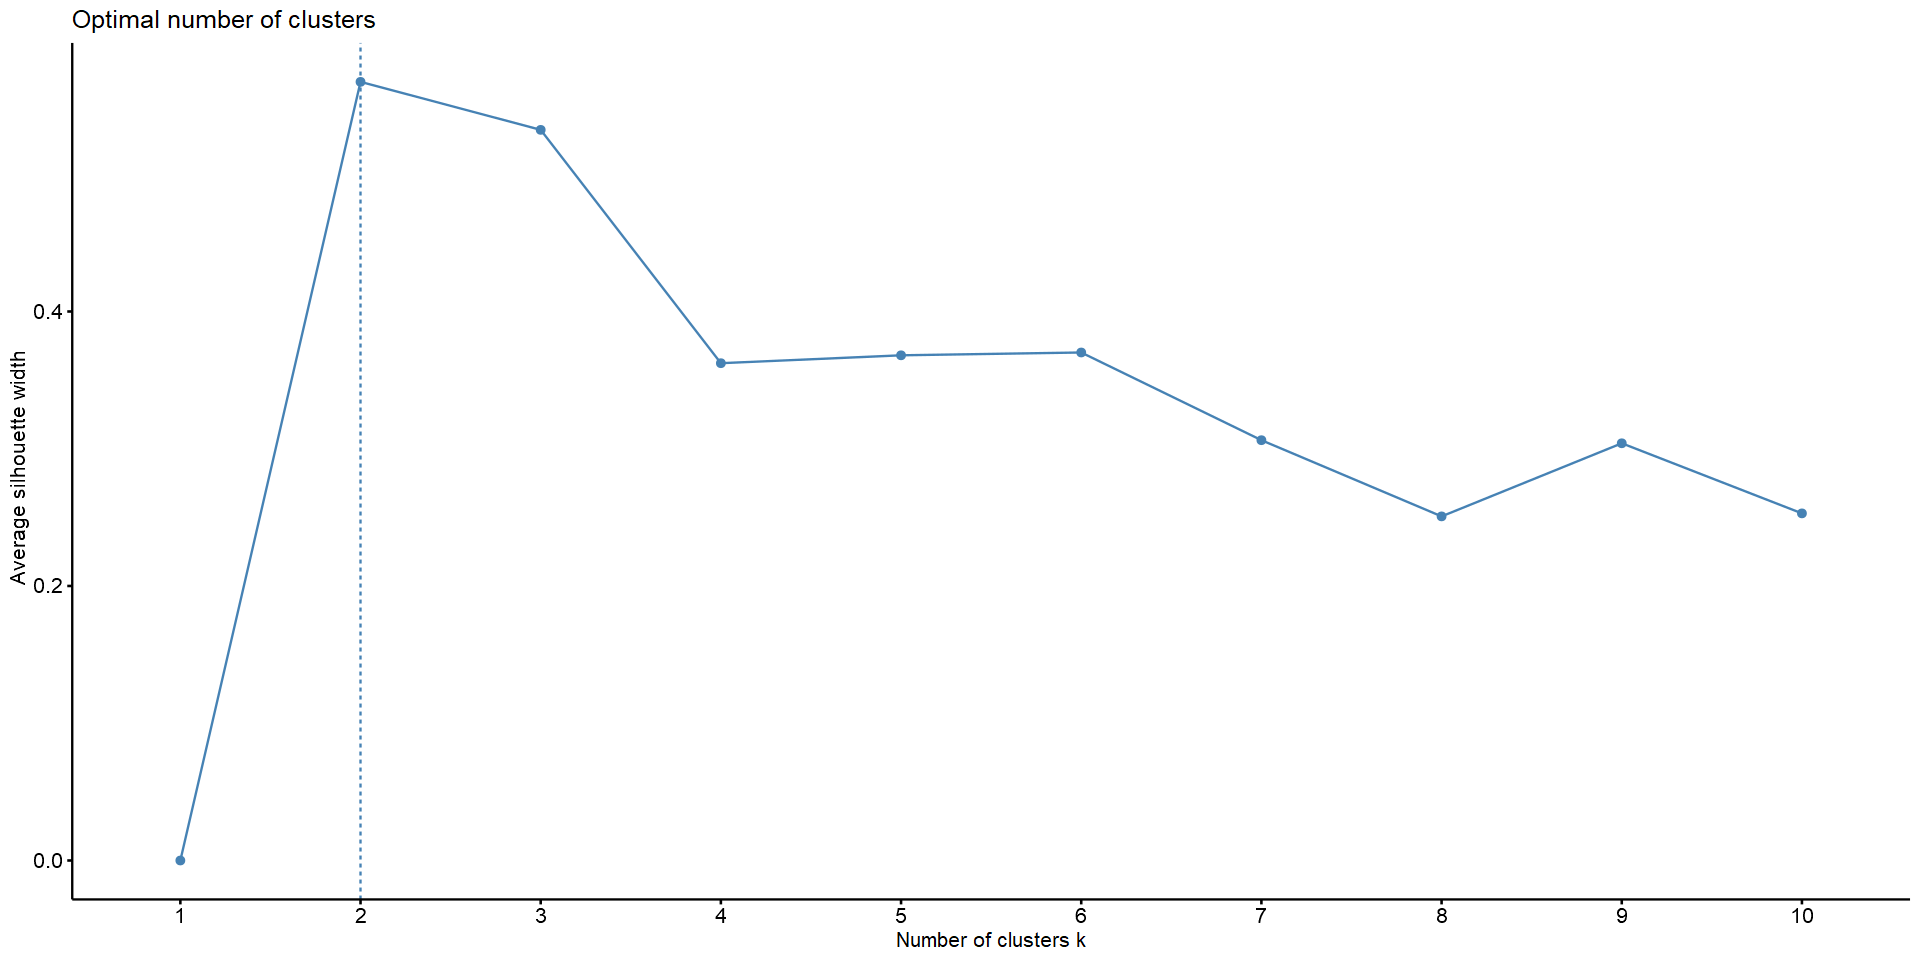

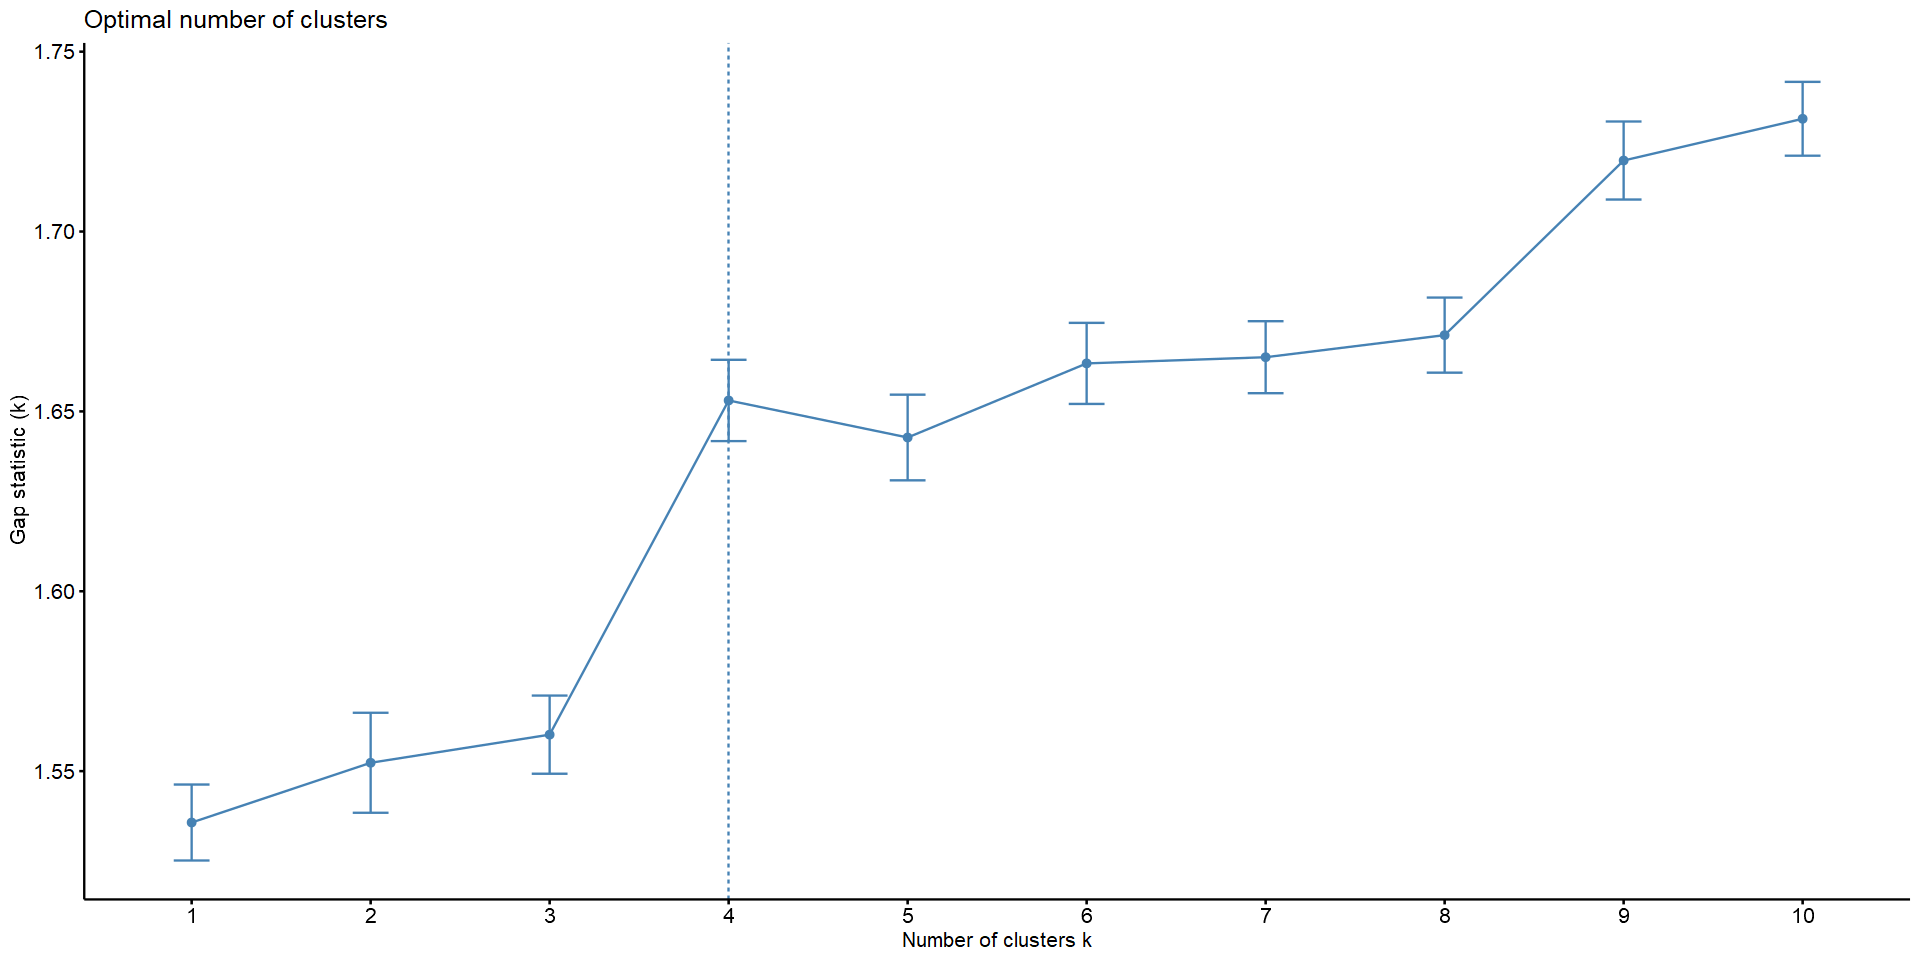

In [4]:
# Determine Number of Clusters “Elbow method”, for total within-cluster sum of square
options(repr.plot.width=16, repr.plot.height=8)
factoextra::fviz_nbclust(wholesale.std, kmeans, method = "wss")
# “Silhouette-score method”, for how similar a data point is within-cluster
factoextra::fviz_nbclust(wholesale.std, kmeans, method = "silhouette")
# “Gap Statistic Method”
factoextra::fviz_nbclust(wholesale.std, kmeans, method = "gap_stat")

## Fit K-means model

In [5]:
# Define number of clusters
k2_clusters <- 2
# Perform k-means clustering on a data
set.seed(222)
fit.kmeans2 <- kmeans(wholesale.std,
#number of clusters
                     centers = k2_clusters,
#how many random sets should be chosen
                     nstart = 100,
#the maximum number of iterations allowed
                     iter.max = 100)

## See various components

In [6]:
# A vector of integers (from 1:k) indicating the cluster to which each point is allocated.
fit.kmeans2$cluster
# A matrix of cluster centres.ex in the 1st line, column Fresh -0.05283636 standard deviations above the mean of the variable Fresh.
fit.kmeans2$centers
#The total sum of squares|| the smaller the value, the better the model's ability to explain variation in the data
fit.kmeans2$totss
# The total sum of squares|| the smaller the value, the better the model's ability to explain variation in the data
fit.kmeans2$totss
# Vector of within-cluster sum of squares, one component per cluster.||The smaller the value, the more compact the cluster.
fit.kmeans2$withinss
# The between-cluster sum of squares, i.e. totss-tot.withinss.||The greater the betweenss value, the greater the separation between the clusters and, therefore, the better the clustering result.
fit.kmeans2$betweenss
# The number of points in each cluster.
fit.kmeans2$size
# The number of (outer) iterations || number of times the algorithm updated the centroids before arriving at a solution
fit.kmeans2$iter
# Integer: indicator of a possible algorithm problem – for experts.||If ifault = 0, it indicates that the solution has converged, while a non-zero value indicates that the solution has not converged.
fit.kmeans2$ifault

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  2   2   2   1   2   2   2   2   1   2   2   2   2   2   2   2   2   2   2   2 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  2   2   2   1   2   1   1   1   2   1   2   2   2   2   2   2   1   2   2   2 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  2   1   2   2   2   1   2   2   2   2   2   2   2   2   2   2   2   1   2   2 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  2   2   2   2   2   1   1   2   2   2   2   2   1   2   2   2   2   2   2   2 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
  2   2   2   2   2   1   2   2   2   2   2   2   2   2   2   1   2   2   2   2 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 
  2   2   2   1   2   1   2   2   2   2   2   1   2   2   2   2   2   2   2   2 
181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 
  2   1   2   1   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 
  1   1   2   2   2   1   2   2   2   1   2   1   2   2   2   2   1   2   2   2 
221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 
  2   2   2   2   2   2   2   2   2   2   2   1   2   2   2   2   2   2   2   2 
261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 
  2   1   2   2   1   2   1   2   2   1   2   2   1   2   2   2   2   2   2   1 
321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 
  2   2   2   2   2   1   2   2   2   2   2   1   2   1   2   2   2   2   2   2 
341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 
  2   2   2   1   2   2   2   2   2   1   2   1   2   2   2   2   2   2   2   2 
361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   1   2   2

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
1,0.05283636,2.0659269,2.2407190,0.32219794,2.2585338,0.8039597
2,-0.00542930,-0.2122882,-0.2302493,-0.03310806,-0.2320799,-0.0826124


[1] 2634

[1] 2634

[1] 966.3860 982.9619

[1] 684.6521

[1]  41 399

[1] 1

[1] 0

## k=3

In [7]:
k3_clusters <- 3
set.seed(222)
fit.kmeans3 <- kmeans(wholesale.std,
                     centers = k3_clusters,
                     nstart = 100,
                     iter.max = 100)
fit.kmeans3$centers
fit.kmeans3$totss
fit.kmeans3$withinss
fit.kmeans3$tot.withinss
fit.kmeans3$betweenss
fit.kmeans3$size
fit.kmeans3$iter
fit.kmeans3$ifault

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
1,0.004950908,-0.2277887,-0.2542638,-0.02703683,-0.2486071,-0.08005229
2,-0.306069120,1.8098555,2.2038591,-0.24975466,2.2309315,0.25139852
3,3.840444845,3.2957757,0.9852919,7.20489292,-0.1527927,6.79967230


[1] 2634

[1] 944.8291 441.0021 214.5396

[1] 1600.371

[1] 1033.629

[1] 393  44   3

[1] 2

[1] 0

## k=4 

In [8]:
k4_clusters <- 4
set.seed(222)
fit.kmeans4 <- kmeans(wholesale.std,
                     centers = k4_clusters,
                     nstart = 100,
                     iter.max = 100)
fit.kmeans4$centers
fit.kmeans4$withinss
fit.kmeans4$tot.withinss
fit.kmeans4$betweenss
fit.kmeans4$size
fit.kmeans4$iter
fit.kmeans4$ifault

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
1,3.1644391,3.5092697,1.1090489,5.510889477,-0.03827575,6.42932569
2,-0.5032309,0.5742677,0.8222890,-0.332534148,0.81514988,0.07543838
3,0.1232167,-0.3653209,-0.4314612,0.044915980,-0.42532298,-0.12292750
4,0.3134735,3.9174467,4.2707490,-0.003570131,4.61291490,0.50279301


[1] 256.9932 238.1319 664.9461 149.4481

[1] 1309.519

[1] 1324.481

[1]   4 109 317  10

[1] 3

[1] 0

Based on the various metrics of models with different "K", we could choose a model that makes sense for the problem and for the business.

-----
## Create Clusters on Channel Customers =2

In [9]:
# Selection of data
wholesale.num2 <- wholesale %>% filter(Channel == 2) %>% select(3:8)
# standardize the numerical variables
wholesale.std2 <- as.data.frame(scale(wholesale.num2)) 

## Choose the K parameter

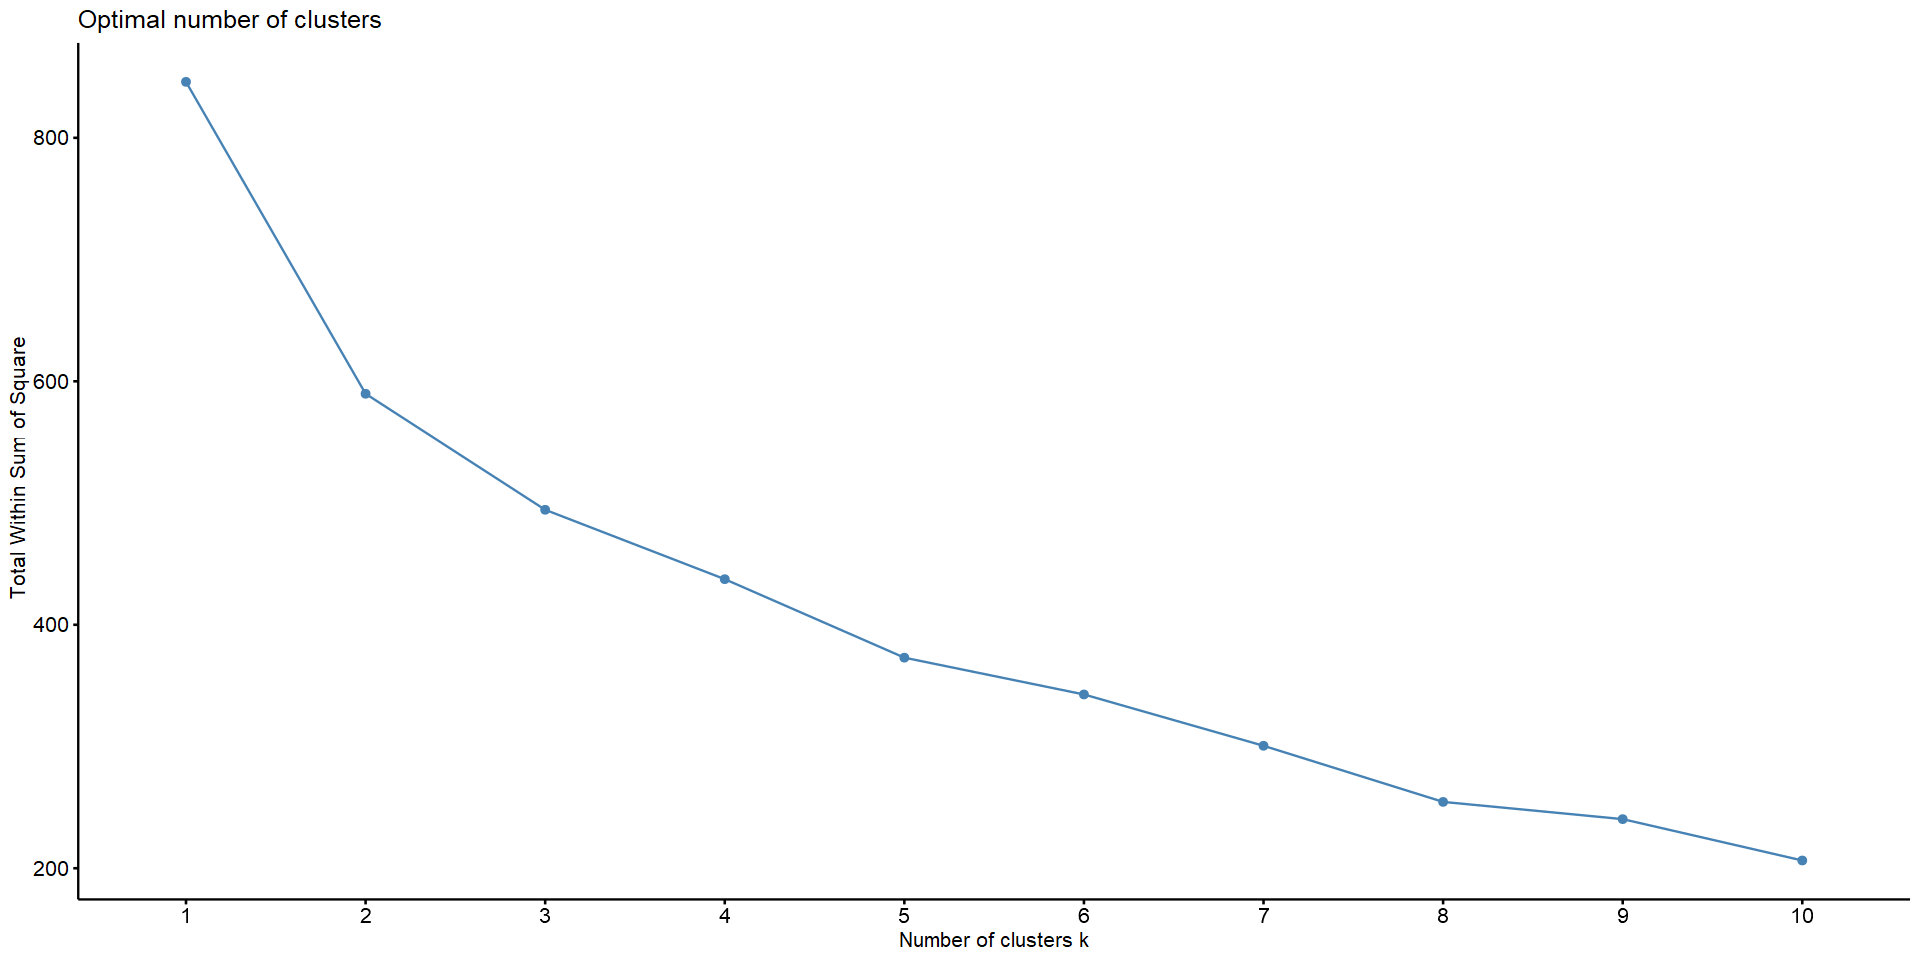

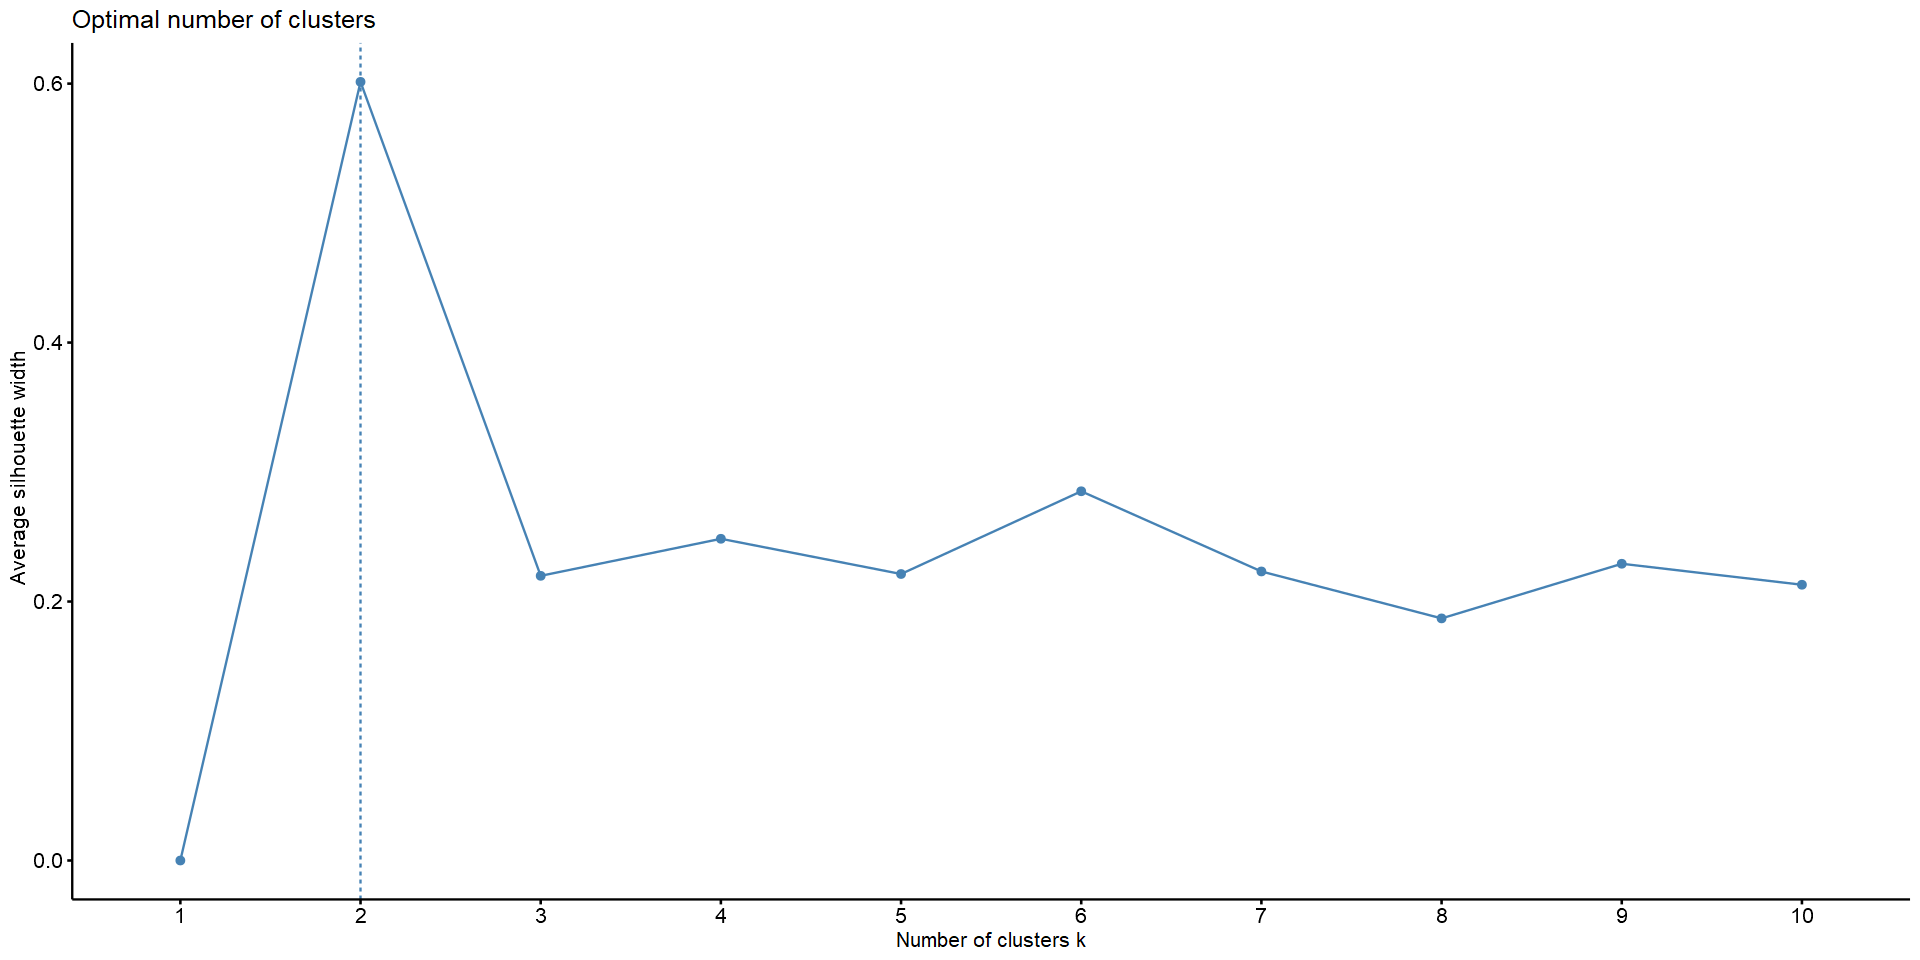

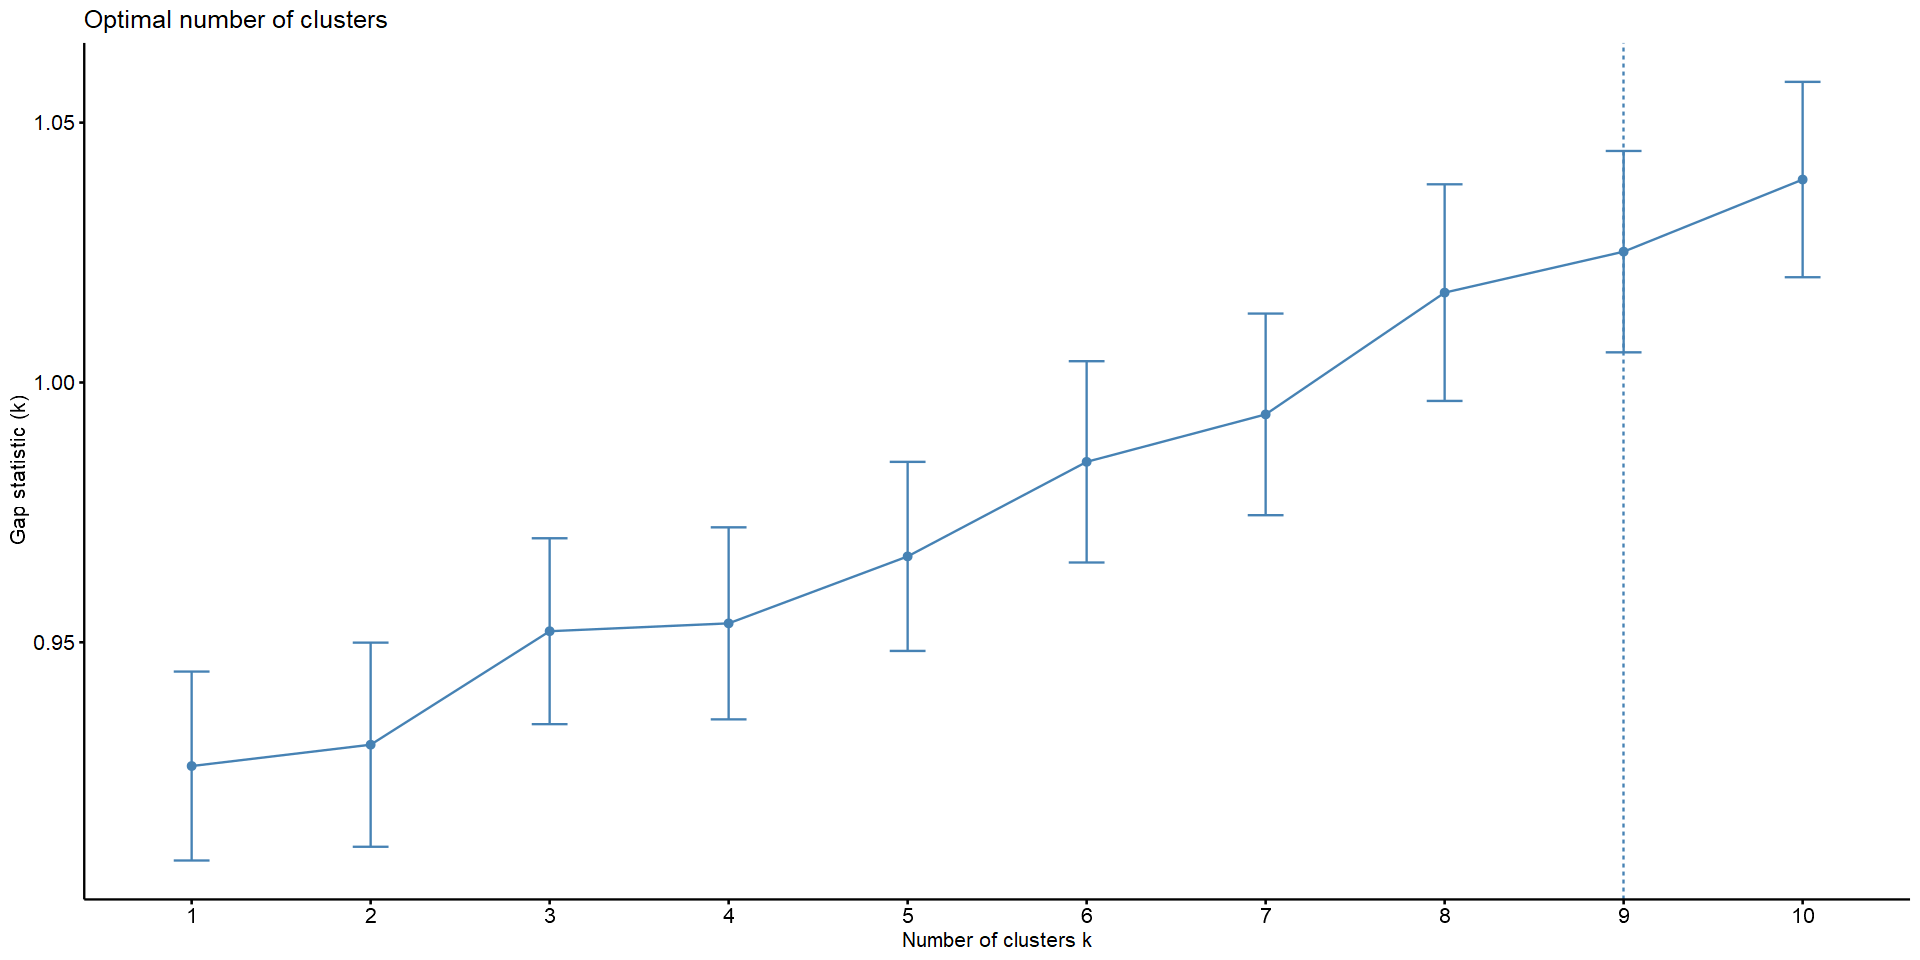

In [10]:
# Determine Number of Clusters
factoextra::fviz_nbclust(wholesale.std2, kmeans, method = "wss")
factoextra::fviz_nbclust(wholesale.std2, kmeans, method = "silhouette")
factoextra::fviz_nbclust(wholesale.std2, kmeans, method = "gap_stat")

## Fit K-means model

In [11]:
# Define number of clusters
k2_clusters_chanel <- 2
# Execute the k-means algorithm
set.seed(222)
fit.kmeans2_channel <- kmeans(wholesale.std2,
                              centers = k2_clusters_chanel,
                              nstart = 100,
                              iter.max = 100)

## View results

In [12]:
print(fit.kmeans2_channel)

K-means clustering with 2 clusters of sizes 131, 11

Cluster means:
        Fresh       Milk   Grocery      Frozen Detergents_Paper Delicassen
1 -0.07480477 -0.2094794 -0.204003 -0.07378079       -0.2100686 -0.1041745
2  0.89085682  2.4947090  2.429490  0.87866210        2.5017262  1.2406237

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 2
 [38] 1 1 2 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

Within cluster sum of squares by cluster:
[1] 400.8665 188.9005
 (between_SS / total_SS =  30.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


## Define number of clusters

In [13]:
k9_clusters_chanel <- 9
set.seed(222)
fit.kmeans9_channel <- kmeans(wholesale.std2,
                              centers = k9_clusters_chanel,
                              nstart = 100,
                              iter.max = 100)
k5_clusters_chanel <- 5
set.seed(222)
fit.kmeans5_channel <- kmeans(wholesale.std2,
                              centers = k5_clusters_chanel,
                              nstart = 100,
                              iter.max = 100)
k3_clusters_chanel <- 3
set.seed(222)
fit.kmeans3_channel <- kmeans(wholesale.std2,
                              centers = k3_clusters_chanel,
                              nstart = 100,
                              iter.max = 100)

## Compare measures

In [14]:
data.frame(
           totss = c(fit.kmeans2_channel$totss, fit.kmeans3_channel$totss, fit.kmeans5_channel$totss, fit.kmeans9_channel$totss),
           tot.withinss = c(fit.kmeans2_channel$tot.withinss,fit.kmeans3_channel$tot.withinss, fit.kmeans5_channel$tot.withinss, fit.kmeans9_channel$tot.withinss),
           betweenss = c(fit.kmeans2_channel$betweenss,fit.kmeans3_channel$betweenss, fit.kmeans5_channel$betweenss, fit.kmeans9_channel$betweenss),
           iter = c(fit.kmeans2_channel$iter,fit.kmeans3_channel$iter, fit.kmeans5_channel$iter, fit.kmeans9_channel$iter),
           row.names = c("kmeans2", "kmeans3","kmeans5", "kmeans9"))

,totss,tot.withinss,betweenss,iter
,<dbl>,<dbl>,<dbl>,<int>
kmeans2,846,589.7670,256.2330,1
kmeans3,846,494.0523,351.9477,3
kmeans5,846,369.6379,476.3621,3
kmeans9,846,225.8352,620.1648,4


The total sum of squares is the same for all models (846), which indicates that all models captured the same amount of variance.

The (tot.withinss) decreases as the number of clusters increases, which is expected since having more clusters allows the model to capture more nuances in the data.

The (betweenss) increases as the number of clusters increases, which indicates that there is greater separation between clusters as the number of clusters increases.

## Compare with BIC e AIC

In [15]:
library(stats)
# Calculate BIC and AIC for k-means model with 2 clusters
n2 <- nrow(wholesale.num2)
k2 <- 2 * ncol(wholesale.num2) # number of parameters
loglik2 <- -fit.kmeans2_channel$tot.withinss / 2 # log-likelihood
bic2 <- log(n2) * k2 - 2 * loglik2
aic2 <- 2 * k2 - 2 * loglik2

# Calculate BIC and AIC for k-means model with 3 clusters
n3 <- nrow(wholesale.num2)
k3 <- 3 * ncol(wholesale.num2) # number of parameters
loglik3 <- -fit.kmeans3_channel$tot.withinss / 2 # log-likelihood
bic3 <- log(n2) * k2 - 2 * loglik3
aic3 <- 2 * k2 - 2 * loglik3

# Calculate BIC and AIC for k-means model with 5 clusters
n5 <- nrow(wholesale.num2)
k5 <- 5 * ncol(wholesale.num2) # number of parameters
loglik5 <- -fit.kmeans5_channel$tot.withinss / 2 # log-likelihood
bic5 <- log(n5) * k5 - 2 * loglik5
aic5 <- 2 * k5 - 2 * loglik5

# Create a data frame with BIC and AIC values
bic_aic_table <- data.frame(
  Model = c("kmeans2", "kmeans3", "kmeans5"),
  BIC = c(bic2, bic3, bic5),
  AIC = c(aic2, aic3, aic5)
)

# Print the table
bic_aic_table

Model,BIC,AIC
<chr>,<dbl>,<dbl>
kmeans2,649.2369,613.7670
kmeans3,553.5222,518.0523
kmeans5,518.3127,429.6379


Based on these values, we can see that the kmeans5 model has a lower BIC and AIC value, which suggests that it is a better fit for the data.

***Model choice, it depends on the context of the problem and the interpretability of the clusters.***